In [1]:
# This is the project for predicting Breast Cancer using Supervised Clusturing Algorithm i.e K Nearest Neighbour and Support Vector Machine

1. IMPORT LIBRARY

In [2]:
import sys
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn import model_selection
from sklearn.metrics import classification_report
from pandas.plotting import scatter_matrix
from sklearn.neighbors import KNeighborsClassifier

In [4]:
path='https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data'

In [5]:
header=['id','Clump Thickness','Uniformity of Cell Size','Uniformity of Cell Shape','Marginal Adhesion','Single Epithelial Cell Size','Bare Nuclei','Bland Chromatin','Normal Nucleoli','Mitoses','Class']

In [6]:
df=pd.read_csv(path,names=header,index_col=0)

In [7]:
df.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
id,,,,,,,,,,
1000025,5,1,1,1,2,1,3,1,1,2
1002945,5,4,4,5,7,10,3,2,1,2
1015425,3,1,1,1,2,2,3,1,1,2
1016277,6,8,8,1,3,4,3,7,1,2
1017023,4,1,1,3,2,1,3,1,1,2


2. DATA PRE-PROCESSING

In [8]:
df.reset_index(drop=True,inplace=True)

In [9]:
missing_data=df.isnull()
missing_data

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
694,False,False,False,False,False,False,False,False,False,False
695,False,False,False,False,False,False,False,False,False,False
696,False,False,False,False,False,False,False,False,False,False
697,False,False,False,False,False,False,False,False,False,False


In [10]:
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print('-------------------')

Clump Thickness
False    699
Name: Clump Thickness, dtype: int64
-------------------
Uniformity of Cell Size
False    699
Name: Uniformity of Cell Size, dtype: int64
-------------------
Uniformity of Cell Shape
False    699
Name: Uniformity of Cell Shape, dtype: int64
-------------------
Marginal Adhesion
False    699
Name: Marginal Adhesion, dtype: int64
-------------------
Single Epithelial Cell Size
False    699
Name: Single Epithelial Cell Size, dtype: int64
-------------------
Bare Nuclei
False    699
Name: Bare Nuclei, dtype: int64
-------------------
Bland Chromatin
False    699
Name: Bland Chromatin, dtype: int64
-------------------
Normal Nucleoli
False    699
Name: Normal Nucleoli, dtype: int64
-------------------
Mitoses
False    699
Name: Mitoses, dtype: int64
-------------------
Class
False    699
Name: Class, dtype: int64
-------------------


In [11]:
[print(df.shape)]

(699, 10)


[None]

In [12]:
df

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2,1,1,1,2
695,2,1,1,1,2,1,1,1,1,2
696,5,10,10,3,7,3,8,10,2,4
697,4,8,6,4,3,4,10,6,1,4


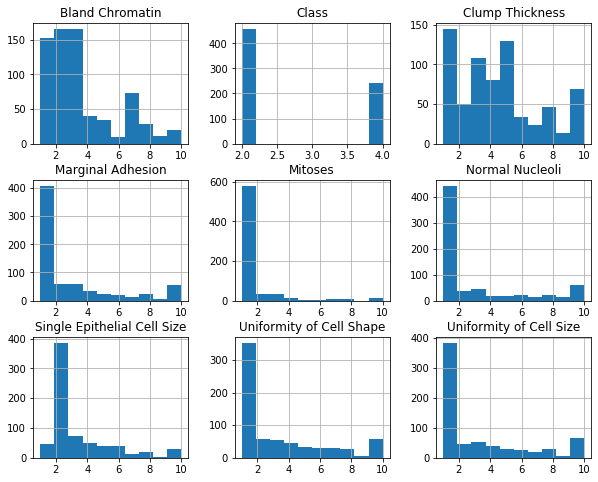

In [13]:
df.hist(figsize=(10,8))
plt.show()

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
Clump Thickness                699 non-null int64
Uniformity of Cell Size        699 non-null int64
Uniformity of Cell Shape       699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Bland Chromatin                699 non-null int64
Normal Nucleoli                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(9), object(1)
memory usage: 54.7+ KB


In [15]:
df=df.fillna(0)

In [16]:
df['Bare Nuclei'] = pd.to_numeric(df['Bare Nuclei'], errors='coerce')

In [41]:
df['Bare Nuclei']=df['Bare Nuclei'].astype('int')

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
Clump Thickness                699 non-null int64
Uniformity of Cell Size        699 non-null int64
Uniformity of Cell Shape       699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null int32
Bland Chromatin                699 non-null int64
Normal Nucleoli                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int32(1), int64(9)
memory usage: 52.0 KB


In [43]:
x=df[['Clump Thickness','Uniformity of Cell Size','Uniformity of Cell Shape','Marginal Adhesion','Single Epithelial Cell Size','Bare Nuclei','Bland Chromatin','Normal Nucleoli','Mitoses']]

In [44]:
df.describe()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.463519,3.437768,2.866953,1.589413,2.689557
std,2.815741,3.051459,2.971913,2.855379,2.214300,3.640708,2.438364,3.053634,1.715078,0.951273
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
Clump Thickness                699 non-null int64
Uniformity of Cell Size        699 non-null int64
Uniformity of Cell Shape       699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null int32
Bland Chromatin                699 non-null int64
Normal Nucleoli                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int32(1), int64(9)
memory usage: 52.0 KB


In [46]:
df['Bare Nuclei'] = pd.to_numeric(df['Bare Nuclei'], errors='coerce')

In [47]:
df['Bare Nuclei'].describe()

count    699.000000
mean       3.463519
std        3.640708
min        0.000000
25%        1.000000
50%        1.000000
75%        5.000000
max       10.000000
Name: Bare Nuclei, dtype: float64

In [48]:
df=df.fillna(0)

In [49]:
df['Bare Nuclei']=df['Bare Nuclei'].astype('int64')

In [50]:
df['Bare Nuclei'].describe()

count    699.000000
mean       3.463519
std        3.640708
min        0.000000
25%        1.000000
50%        1.000000
75%        5.000000
max       10.000000
Name: Bare Nuclei, dtype: float64

In [51]:
x.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1


In [52]:
y=df[['Class']]

In [53]:
y.head()

,Class
0,2
1,2
2,2
3,2
4,2


In [54]:
df.replace('?',-99999,inplace=True)

In [55]:
print(df['Bare Nuclei'].dtype)

int64


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
Clump Thickness                699 non-null int64
Uniformity of Cell Size        699 non-null int64
Uniformity of Cell Shape       699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null int64
Bland Chromatin                699 non-null int64
Normal Nucleoli                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10)
memory usage: 54.7 KB


SPLITTING {TRAIN/TEST}

In [57]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.3,random_state=2)

In [58]:
print("Test Size ",x_test.shape,y_test.shape)
print("Train Size",x_train.shape,y_train.shape)

Test Size  (210, 9) (210, 1)
Train Size (489, 9) (489, 1)


MODELLING THROUGH KNN 

In [59]:
k=10

In [60]:
neigh=KNeighborsClassifier(n_neighbors=k).fit(x_train,y_train)

C:\Users\Ayush Tripathi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


In [61]:
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

PREDICTION THROUGH KNN

In [62]:
yhat=neigh.predict(x_test)
yhat[0:5]

array([2, 4, 2, 2, 2], dtype=int64)

In [63]:
yhat_prob=neigh.predict_proba(x_test)

In [64]:
print(yhat_prob)

[[0.5 0.5]
 [0.  1. ]
 [1.  0. ]
 [1.  0. ]
 [1.  0. ]
 [0.1 0.9]
 [1.  0. ]
 [1.  0. ]
 [0.1 0.9]
 [1.  0. ]
 [1.  0. ]
 [1.  0. ]
 [1.  0. ]
 [0.4 0.6]
 [0.1 0.9]
 [1.  0. ]
 [1.  0. ]
 [1.  0. ]
 [1.  0. ]
 [1.  0. ]
 [1.  0. ]
 [1.  0. ]
 [1.  0. ]
 [1.  0. ]
 [0.  1. ]
 [1.  0. ]
 [0.1 0.9]
 [1.  0. ]
 [0.  1. ]
 [1.  0. ]
 [1.  0. ]
 [0.4 0.6]
 [1.  0. ]
 [0.  1. ]
 [1.  0. ]
 [1.  0. ]
 [0.  1. ]
 [1.  0. ]
 [1.  0. ]
 [1.  0. ]
 [1.  0. ]
 [1.  0. ]
 [0.1 0.9]
 [1.  0. ]
 [1.  0. ]
 [1.  0. ]
 [0.9 0.1]
 [1.  0. ]
 [0.  1. ]
 [1.  0. ]
 [1.  0. ]
 [1.  0. ]
 [0.  1. ]
 [0.  1. ]
 [1.  0. ]
 [1.  0. ]
 [1.  0. ]
 [1.  0. ]
 [1.  0. ]
 [1.  0. ]
 [0.  1. ]
 [1.  0. ]
 [0.  1. ]
 [0.1 0.9]
 [1.  0. ]
 [0.1 0.9]
 [1.  0. ]
 [1.  0. ]
 [1.  0. ]
 [0.1 0.9]
 [1.  0. ]
 [1.  0. ]
 [1.  0. ]
 [0.  1. ]
 [1.  0. ]
 [1.  0. ]
 [1.  0. ]
 [0.  1. ]
 [0.  1. ]
 [1.  0. ]
 [1.  0. ]
 [1.  0. ]
 [1.  0. ]
 [1.  0. ]
 [0.1 0.9]
 [0.  1. ]
 [0.  1. ]
 [1.  0. ]
 [1.  0. ]
 [1.  0. ]
 [1.  0. ]

EVALUATION OF KNN

In [65]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [66]:
jaccard_similarity_score(y_test, yhat) 

C:\Users\Ayush Tripathi\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


0.9476190476190476

In [67]:
f1_score(y_test, yhat,average='weighted')

0.9475169404993966

In [68]:
log_loss(y_test,yhat_prob)

0.26350041594382656

In [69]:
print(classification_report(y_test,yhat))

              precision    recall  f1-score   support

           2       0.96      0.96      0.96       142
           4       0.93      0.91      0.92        68

    accuracy                           0.95       210
   macro avg       0.94      0.94      0.94       210
weighted avg       0.95      0.95      0.95       210



In [70]:
x

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1
...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2,1,1,1
695,2,1,1,1,2,1,1,1,1
696,5,10,10,3,7,3,8,10,2
697,4,8,6,4,3,4,10,6,1


In [100]:
test_case=np.array(([7,8,5,1,9,3,4,1,12]))

In [101]:
test_case=test_case.reshape(1,-1)

In [102]:
prediction=neigh.predict(test_case)

In [103]:
print(prediction)

[4]


MODELLING THROUGH SVM

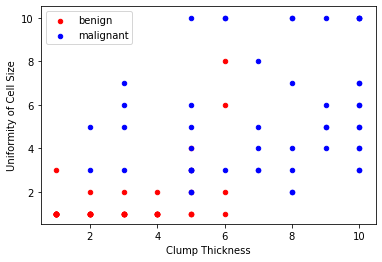

In [77]:
ax=df[df['Class']==2][0:50].plot(kind='scatter',x='Clump Thickness',y='Uniformity of Cell Size',color='red',label='benign');
df[df['Class']==4][0:50].plot(kind='scatter',x='Clump Thickness',y='Uniformity of Cell Size',color='blue',label='malignant',ax=ax);
plt.show()

In [78]:
x

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1
...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2,1,1,1
695,2,1,1,1,2,1,1,1,1
696,5,10,10,3,7,3,8,10,2
697,4,8,6,4,3,4,10,6,1


In [79]:
y

,Class
0,2
1,2
2,2
3,2
4,2
...,...
694,2
695,2
696,4
697,4


In [87]:
clf = svm.SVC(kernel='rbf',probability=True)
clf.fit(x_train, y_train) 

C:\Users\Ayush Tripathi\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Ayush Tripathi\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

PREDICTION OF SVM

In [81]:
yhat1 = clf.predict(x_test)
yhat1 [0:5]

array([4, 4, 2, 2, 2], dtype=int64)

In [88]:
yhat_prob1=clf.predict_proba(x_test)

In [90]:
print("Prediction of knn",yhat[0:10])
print("Prediction of svm",yhat1[0:10])

Prediction of knn [2 4 2 2 2 4 2 2 4 2]
Prediction of svm [4 4 2 2 2 4 2 2 4 2]


EVALUATION OF SVM

In [91]:
jaccard_similarity_score(y_test, yhat1) 

C:\Users\Ayush Tripathi\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


0.9428571428571428

In [92]:
f1_score(y_test, yhat1,average='weighted')

0.943771337151999

In [112]:
log_loss(y_test,yhat_prob1)

0.14048568282058307

In [94]:
print(classification_report(y_test,yhat))

              precision    recall  f1-score   support

           2       0.96      0.96      0.96       142
           4       0.93      0.91      0.92        68

    accuracy                           0.95       210
   macro avg       0.94      0.94      0.94       210
weighted avg       0.95      0.95      0.95       210



In [104]:
test_case1=np.array(([7,8,5,1,9,3,4,1,12]))

In [105]:
test_case1=test_case1.reshape(1,-1)

In [106]:
prediction1=clf.predict(test_case1)

In [107]:
print(prediction1)

[4]


FINAL REPORT

In [108]:
result=dict()

In [116]:
result={'Algorithm':["KNN","SVM"] , 'Jaccard':[0.94,0.94] , 'F1-score':[0.94,0.94] , 'log loss':[0.26,0.14]}

In [117]:
final_result=pd.DataFrame(result)

In [118]:
final_result

,Algorithm,Jaccard,F1-score,log loss
0,KNN,0.94,0.94,0.26
1,SVM,0.94,0.94,0.14
